# **Import Modules**

## *python*

In [1]:
# Import python modules
import os,sys
import pandas as pd

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join('..')))

##import relevant modules
try:
    from scripts._02_Feature_Engineering import FraudDetectionPipeline

except ImportError:
    print('Could not import module from `scripts/`.')

# **Feature Engineering and Fraud Detection Pipeline**

In [3]:
# Define DataFrame path
df_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed/processed_data.csv')
plot_path = os.path.join(os.path.dirname(os.getcwd()), 'plots/featureengineering')
df_dir = os.path.join(os.path.dirname(os.getcwd()), 'data','processed')
mdl_dir = os.path.join(os.path.dirname(os.getcwd()), 'models')

In [4]:
# Initalise pipeline
pipeline = FraudDetectionPipeline(df_path = df_path, df_dir = df_dir,
                                    plot_path = plot_path, mdl_dir = mdl_dir)

# Load data and save processed data
pipeline.load_and_split_data()
pipeline.save_processed_data()

Data loaded, split, aggregated, and categorical NAs filled.

Processed DataFrame saved to: ..\data\processed\feature_engineering_data.csv

DataFrame Head:


,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,txn_hour,txn_day,txn_month,txn_year,total_txn_amount,avg_txn_amount,txn_count,std_txn_amount
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,2,15,11,2018,1000.00,500.000000,2,0.000000
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,1000,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610



DataFrame Description:


,Amount,Value,PricingStrategy,FraudResult,txn_hour,txn_day,txn_month,txn_year,total_txn_amount,avg_txn_amount,txn_count,std_txn_amount
count,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,9.495000e+04
mean,6.717846e+03,2358.107524,2.255974,0.002018,12.447722,15.902898,6.566233,2018.497115,-3.599090e+06,6.717846e+03,392.982982,1.803696e+04
std,1.233068e+05,3116.839524,0.732924,0.044872,4.846964,8.962822,5.224310,0.499994,2.180271e+07,8.568352e+04,878.631072,8.929570e+04
min,-1.000000e+06,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,-1.049000e+08,-4.250000e+05,1.000000,0.000000e+00
25%,-5.000000e+01,275.000000,2.000000,0.000000,8.000000,8.000000,1.000000,2018.000000,6.000000e+04,1.260812e+03,32.000000,3.206563e+03
50%,1.000000e+03,1000.000000,2.000000,0.000000,13.000000,16.000000,11.000000,2018.000000,2.015113e+05,2.272951e+03,93.000000,5.896327e+03
75%,2.800000e+03,3000.000000,2.000000,0.000000,17.000000,24.000000,12.000000,2019.000000,7.089360e+05,4.080464e+03,273.000000,1.038269e+04
max,9.880000e+06,12050.000000,4.000000,1.000000,23.000000,31.000000,12.000000,2019.000000,8.345124e+07,8.601821e+06,4091.000000,3.309916e+06


In [5]:
# Compute breaks and apply transformation
pipeline.compute_monotonic_breaks()
pipeline.compute_categorical_breaks()
pipeline.apply_woe_transformation()

# Prepare DataFrame
pipeline.merge_and_clean()

# Save WOE transformed data
pipeline.save_woe_transformed_data("WoE_encoded_data.csv")


Numeric WOE breaks computed.
[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20250702_070930.py

Categorical WOE breaks computed and merged.
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...

WOE transformation applied.

Final dataset merged and cleaned.

WoE-transformed dataset saved to: ..\data\processed\WoE_encoded_data.csv


In [6]:
# WoE and IV transformation
pipeline.run_iv_analysis()
pipeline.filter_variables()

IV Analysis:

                variable  info_value
7             Amount_woe    7.828734
0                 Amount    6.712406
19    std_txn_amount_woe    5.219029
3                  Value    5.016896
17  total_txn_amount_woe    4.438720
11    avg_txn_amount_woe    4.333268
14        ProviderId_woe    3.592138
10         ProductId_woe    3.353317
2       total_txn_amount    1.908611
13        avg_txn_amount    1.903049
24        std_txn_amount    1.876843
22         ChannelId_woe    1.457114
4              txn_count    1.052966
1    ProductCategory_woe    0.932981
8                txn_day    0.681237
18              txn_hour    0.435640
23             txn_month    0.176962
15          txn_hour_woe    0.149812
6               txn_year    0.090093
20          txn_year_woe    0.090093
21   PricingStrategy_woe    0.083034
16         txn_count_woe    0.071860
12             Value_woe    0.040301
9          txn_month_woe    0.017169
5            txn_day_woe    0.012828
[INFO] filtering variabl

Model trained.

Coefficients:
[[ 2.37894417e-06  9.91573563e-01 -1.72069329e-08 -9.06280605e-04
  -8.02154641e-03 -1.61143168e-03  1.09954905e-03 -7.69509831e-01
   1.79374871e-07 -6.49420139e-01 -1.28524651e+00 -9.07910753e-01
  -5.23308931e-02  0.00000000e+00  0.00000000e+00  6.23094469e-01
  -3.10053755e-02 -1.17303543e-06]]

Train Performance:


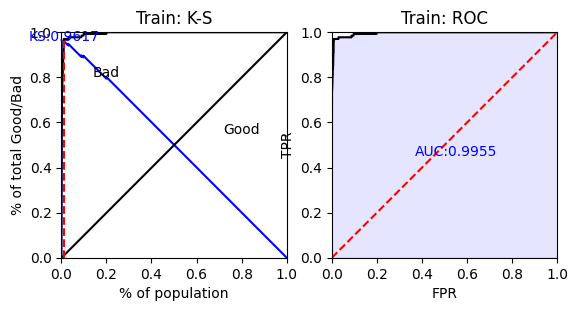

Test Performance:


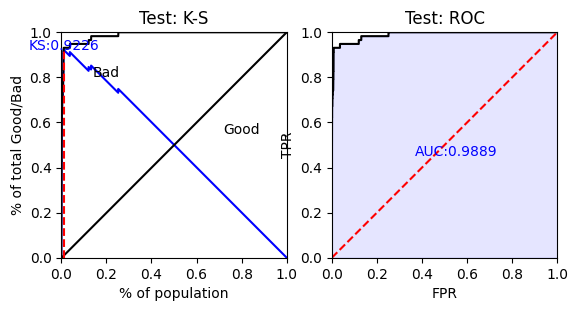

Accuracy: 0.9981184013380258
AUC Score: 0.6205150802623199

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       0.58      0.24      0.34        58

    accuracy                           1.00     28699
   macro avg       0.79      0.62      0.67     28699
weighted avg       1.00      1.00      1.00     28699


Plot saved to ..\plots\featureengineering\Confusion Matrix - Logistic Regression.png


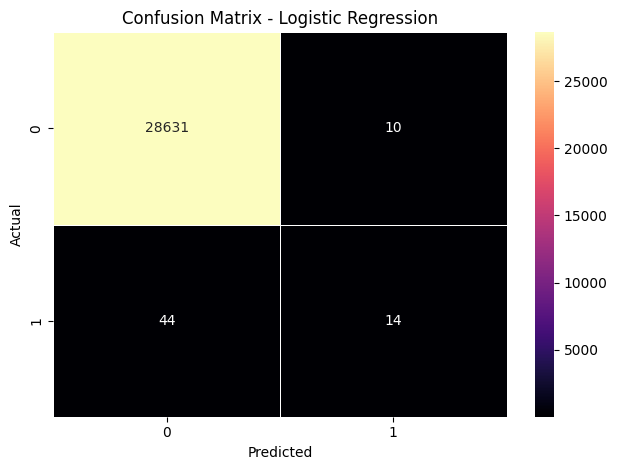

In [7]:
# Model training evaluation and prediction
pipeline.train_model()

pipeline.evaluate_model()

#pipeline.predict(df_new)

In [8]:
# Save the model
pipeline.save_model()


Model saved to: ..\models\fraud_model.pkl


In [9]:
# Open saved model
pipeline.load_model()


Model loaded from: ..\models\fraud_model.pkl
